In [1]:
# 1° SE ABRE LA BIBLOTECA PANDAS
import pandas as pd

In [2]:
# 2° SE CARGA EL DATA SET
from google.colab import files
uploaded = files.upload()

Saving dataset_trabajo.xls to dataset_trabajo.xls


In [3]:

# 3° SE CREA EL DATAFRAME
df_probabilidad = pd.read_excel('dataset_trabajo.xls')


In [4]:
# 4° SE CORROBORA QUE ESTE BIEN CARGADO EL DATAFRAME
df_probabilidad.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## **Descripción de data frame: **
El presente dataset tiene como objetivo crear un modelo estadístico para calcular la probabilidad de que un usuario de una tarjeta de crédito la pague a termino o no. Por lo que esta investigación emplea una variable binaria, pago por defecto (Sí = 1, No = 0), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas:
•	X1: Monto del crédito otorgado (NT dólar): incluye tanto el crédito al consumidor individual como el crédito (complementario) familiar.
•	X2: Género (1 = masculino; 2 = femenino).
•	X3: Educación (1 = escuela de posgrado; 2 = universidad; 3 = escuela secundaria; 4 = otros).
•	X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
•	X5: Edad (año).
•	X6 - X11: Historial de pago anterior. Rastreamos los registros de pago mensuales anteriores (de abril a septiembre de 2005) de la siguiente manera: X6 = el estado de pago en septiembre de 2005; X7 = el estado de pago en agosto de 2005; . . .;X11 = estado de pago en abril de 2005.
•	La escala de medición para el estado de pago es:
o	-1 = pago puntual;
o	1 = retraso en el pago de un mes;
o	2 = retraso en el pago de dos meses; . .  8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.
•	X12-X17: Importe del estado de cuenta (NT en dólares).
•	X12 = importe del estado de cuenta en septiembre de 2005;
•	X13 = importe del estado de cuenta en agosto de 2005; . . .;
•	X17 = importe del estado de cuenta en abril de 2005.
•	X18-X23: Importe del pago anterior (NT en dólares).
•	X18 = importe pagado en septiembre de 2005;
•	X19 = importe pagado en agosto de 2005; . . .;X23 = importe pagado en abril de 2005.


In [5]:
# 5° SE CONTROLA QUE NO HAYA VALORES NULOS
df_probabilidad.shape


(30000, 25)

In [6]:
 #5° SE CONTROLA QUE NO HAYA VALORES NULOS
 df_probabilidad.describe().round()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,...,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,15000.0,167484.0,2.0,2.0,2.0,35.0,-0.0,-0.0,-0.0,-0.0,...,43263.0,40311.0,38872.0,5664.0,5921.0,5226.0,4826.0,4799.0,5216.0,0.0
std,8660.0,129748.0,0.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,...,64333.0,60797.0,59554.0,16563.0,23041.0,17607.0,15666.0,15278.0,17777.0,0.0
min,1.0,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,...,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7501.0,50000.0,1.0,1.0,1.0,28.0,-1.0,-1.0,-1.0,-1.0,...,2327.0,1763.0,1256.0,1000.0,833.0,390.0,296.0,252.0,118.0,0.0
50%,15000.0,140000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,19052.0,18104.0,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0,0.0
75%,22500.0,240000.0,2.0,2.0,2.0,41.0,0.0,0.0,0.0,0.0,...,54506.0,50190.0,49198.0,5006.0,5000.0,4505.0,4013.0,4032.0,4000.0,0.0
max,30000.0,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,...,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0


In [ ]:
# COMO EL DF.SHAPE Y EL DF.DESCRIBE.ROUND COINCIDEN QUE HAY 3001 REGISTROS Y 25 VARIOABLE, SE PUEDE AFIRMAR QUE EL DATASET NO TIENE VALORES NULOS

MODELO:
El objetivo de este trabajo es realizar un modelo de regresíon lineal, donde a partir del sexo, el nivel de educacion, estado civil, edad y el saldo pago o impago de la tarjeta de credito, nos de como respuesta una variable Y que representa la probabilidad de que se pague el saldo total de la tarjeta de credito.

MEDIDAS DE TENDENCIA CENTRAL:

In [8]:
# MEDIA DEL MONTO OTORGADO EN LAS TARJETAS DE CREDITO
df_probabilidad['X1'].mean().round()
df_probabilidad['X1'].std().round()
df_probabilidad['X1'].median
# El saldo otorgado promedio es de $167.484 USD con un desvio estandar de 129.748 usd
# El siguiente grafico nos ayuda a entender si hay valores extremos


<bound method Series.median of 0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: X1, Length: 30000, dtype: int64>

In [ ]:
# grafico boxplot sobre el ingreso dado:


In [9]:
# 1° se importa la bibloteca  matplotlib.pylot
import matplotlib.pyplot as plt
# se crean los cuartiles de los id de clientes en el data frame
df_probabilidad['cuartil_ID'] = pd.qcut(df_probabilidad['ID'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [10]:
# SE AGRUPAN LOS CUARTILES EN FUNCION DEL DINERO OTORGADO EN LA TARJETA DE CREDITO
cuartiles = df_probabilidad.groupby('cuartil_ID')['X1'].apply(list)


<ipython-input-10-176b6af6bba3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cuartiles = df_probabilidad.groupby('cuartil_ID')['X1'].apply(list)


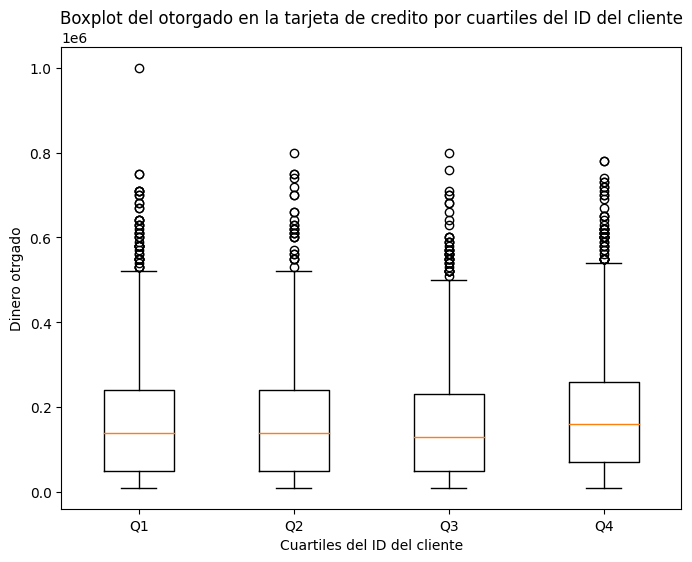

In [11]:
# codigo del greafico:
plt.figure(figsize=(8,6))
plt.boxplot(cuartiles, labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('Boxplot del otorgado en la tarjeta de credito por cuartiles del ID del cliente')
plt.xlabel('Cuartiles del ID del cliente')
plt.ylabel('Dinero otrgado')
plt.show()

In [ ]:
# este grafico nos permite ver la variacion de los datos que tenemos. Pero si se observa la linea narnaja
# y la aplitud de las cajas y bigotes, se podria afirmar que no posee tanta variacion, lo que es buena senial
# para nuestro modelo de regresión lineal, ya que se podria estar cumpliendo el supuesto de homogenidad de varianza de los residuos.

Text(0.5, 1.0, 'grafico de dispercion entre el nivel de educacion y la probabilidad de impago')

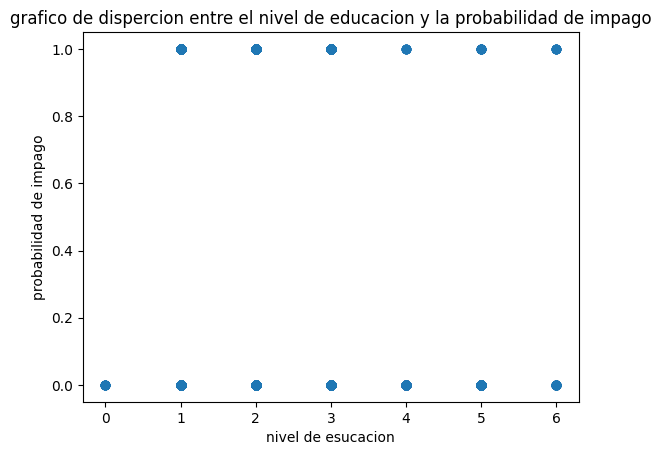

In [12]:
# grafico de dispercion entre el nivel de educacion y la probabilidad de impago
import matplotlib.pyplot as plt
plt.scatter(df_probabilidad['X3'], df_probabilidad['Y'])
plt.xlabel('nivel de esucacion')
plt.ylabel('probabilidad de impago')
plt.title('grafico de dispercion entre el nivel de educacion y la probabilidad de impago')




In [ ]:
# NO SE VE UNA RELACION ENTRE LA PROBABILIDAD DE NO PAGAR Y EL NIVEL DE EDUCACION

Text(0.5, 1.0, 'Histograma MONTOS OTORGADOS')

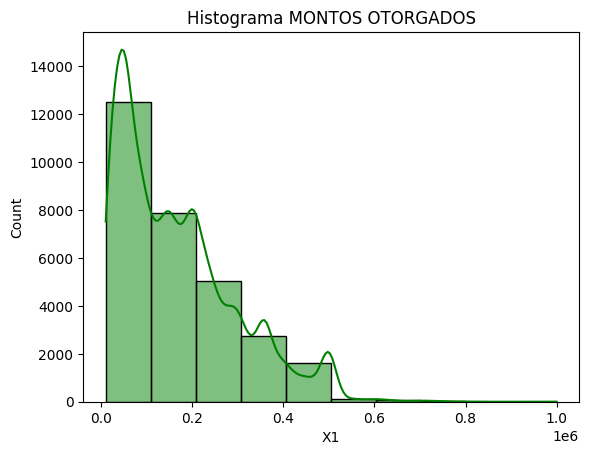

In [13]:
# HISTOGRAMA DE LOS MONTOS OTORGADOS
import seaborn as sns
sns.histplot(df_probabilidad['X1'], bins=10, kde=True, color='green')
plt.title('Histograma MONTOS OTORGADOS')


In [ ]:
# NO SE OBSERVA UNA DISTRIBUCION DE CAMPANA,
#POR LO QUE SE PODRIA DECIR QUE NO SE DISTRIBUYE DE FORMA NORMAL, LO QUE SERIA UN PROBLEMA A LA HORA DE VALIDAR LOS SUPUESTOS DEL MODELO

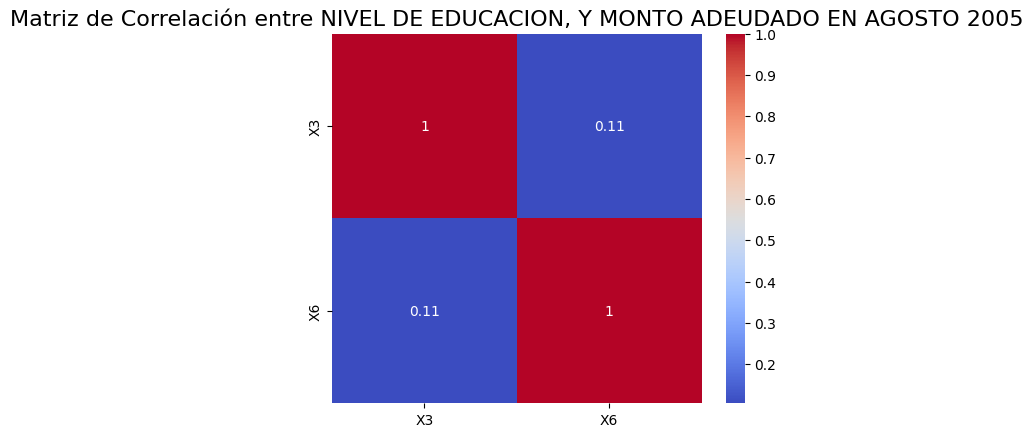

In [25]:
# Calcular la correlación entre dos columnas
corr_value = df_probabilidad['X3'].corr(df_probabilidad['X6'])

# Crear una matriz de correlación manualmente para el heatmap
corr_matrix = pd.DataFrame([[1, corr_value], [corr_value, 1]],
                            index=['X3', 'X6'],
                            columns=['X3', 'X6'])

# Graficar el heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10}, square=True)

# Mostrar el gráfico de correlación
plt.title('Matriz de Correlación entre NIVEL DE EDUCACION, Y MONTO ADEUDADO EN AGOSTO 2005', fontsize=16)
plt.show()



In [ ]:
# SE PUEDE DECIR QUE HAY UNA CORRELACION DEL 0,11% ENTRE EL NIVEL DE EDUCACION, Y EL ESTADO DE CUENTA EN AGOSTO DE 2005, ES DECIR QUE CADA VEZ QUE AUMENTA UN NIVEL EL NIVEL EDUCATIVO, LA PROBABILIDAD DE
# PAGAR LA TARJETA AUMENTA UN 11%

In [ ]:
# DISPERCION ENTRE EL SEXO DEL CLIENTE Y LA PROBABILIDAD DE PAGO

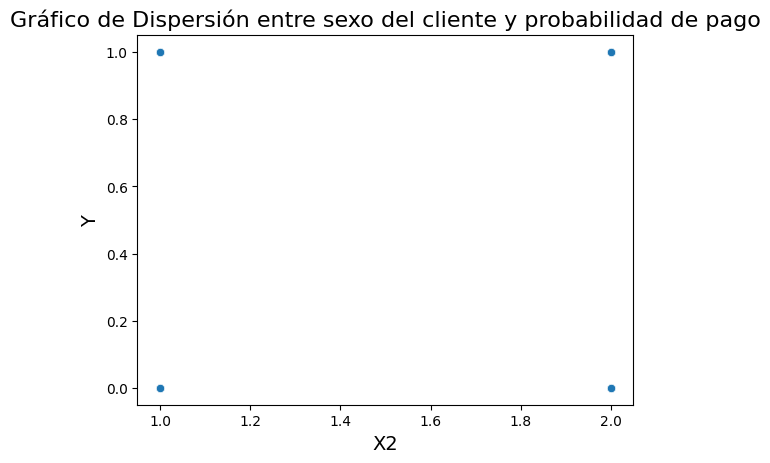

In [27]:
sns.scatterplot(data=df_probabilidad, x='X2', y='Y')

# Añadir título y etiquetas
plt.title('Gráfico de Dispersión entre sexo del cliente y probabilidad de pago', fontsize=16)
plt.xlabel('X2', fontsize=14)
plt.ylabel('Y', fontsize=14)

# Mostrar el gráfico
plt.show()


In [ ]:
# NO SE OBSERVA UNA RELACION CLARA ENTRE LAS VARIABLES.